In [2]:
import numpy as np


In [1]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [3]:
class Knn_classifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    # Ex2:
    # - calculam distantele dintre test_image si toate exemplele din self.train_images
    # - in sort_index pastram pozitiile celor mai mici distante
    # - in nearest_labels pastram etichetele/clasele celor mai apropiate exemple (cu distantele cele mai mici)
    # - histc va fi un vector de frecventa pentru etichetele/clasele din nearest_labels
    # - cea mai frecventa clasa este gasita cu argmax in histc si aceea va fi predictia pentru test_image
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        if(metric == 'l2'):   
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis = 1))
        elif(metric == 'l1'):
            distances = np.sum(abs(self.train_images - test_image), axis = 1)
        else:
            print('Error! Metric {} is not defined!'.format(metric))
        
        sort_index = np.argsort(distances)
        sort_index = sort_index[:num_neighbors]
        nearest_labels = self.train_labels[sort_index] 
        histc = np.bincount(nearest_labels)
        return np.argmax(histc)
    #Ex3:
    # - pentru fiecare imagine din test_images obtinem predictia (eticheta/clasa) apeland functia classify_image
    # - acuratetea este data de: nr exemple corect clasificate/ nr total de exemple 
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        num_test_images = test_images.shape[0] 
        predicted_labels = np.zeros((num_test_images), int)
        
        for i in range(num_test_images): 
            predicted_labels[i] = self.classify_image(test_images[i, :], num_neighbors = num_neighbors, metric = metric)
        
        return predicted_labels
    
    def accuracy_score(self, y_true, y_pred):
        return (y_true == y_pred).mean()
    
    

In [6]:
train_images = np.loadtxt('./data/train_images.txt') 
train_labels = np.loadtxt('./data/train_labels.txt', 'float')
test_images = np.loadtxt('./data/test_images.txt') 
test_labels = np.loadtxt('./data/test_labels.txt', 'float')
train_labels = train_labels.astype(dtype=int)
test_labels = test_labels.astype(dtype=int)

## Apeluri de functii pentru ex3
classifier = Knn_classifier(train_images, train_labels)
predicted_labels = classifier.classify_images(test_images)
accuracy = classifier.accuracy_score(test_labels, predicted_labels)

np.savetxt('predictii_3nn_l2_mnist.txt', predicted_labels)
print('The classifier accuracy using l2 distance and 3 neighbors is ', accuracy)

The classifier accuracy using l2 distance and 3 neighbors is  0.898


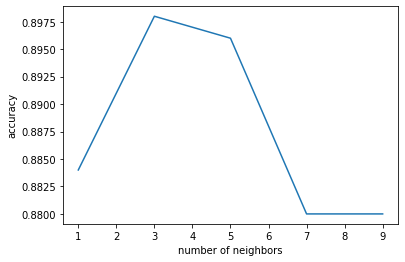

In [7]:

import matplotlib.pyplot as plt
## Ex4 a) 
## num_neighbors va contine fiecare numar impar intre 1 si 10. Pentru fiecare valoare calculam acuratetea asemanator
## cu exercitiul anterior si o salvam
## Graficul il facem cu functia plot unde axa X e reprezentata de num_neighbors si axa Y de acurateti
max_num_neighbors = 10
num_neighbors = [i for i in range(1, max_num_neighbors, 2)]
accuracy = np.zeros((len(num_neighbors)))

for n in range(len(num_neighbors)): 
    predicted_labels = classifier.classify_images(test_images, num_neighbors = num_neighbors[n], metric = 'l2')
    accuracy[n] = classifier.accuracy_score(test_labels, predicted_labels)
      
plt.plot(num_neighbors, accuracy)

plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.show()

In [8]:
np.savetxt('acuratete_l2.txt', accuracy) 

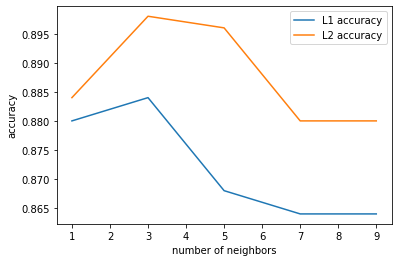

In [10]:
## 4 b) Pentru acest punct avem deja valorile pentru acuratete in cazul L2 de la punctul anterior, deci nu mai e nevoie
## sa le recalculam.
## Repetam aceeasi logica precum la punctul a), doar ca folosim metrica L1.
## Plotarea in aceeasi figura o facem prin 2 call-uri consecutive ale functiei plot.
accuracy_l2 = np.loadtxt('acuratete_l2.txt')
for n in range(len(num_neighbors)): 
    predicted_labels = classifier.classify_images(test_images, num_neighbors = num_neighbors[n], metric = 'l1')
    accuracy[n] = classifier.accuracy_score(test_labels, predicted_labels)
      
# Ploteaza punctele
plt.plot(num_neighbors, accuracy, label='L1 accuracy')
plt.plot(num_neighbors, accuracy_l2,label='L2 accuracy')


# Adauga etichete pentru fiecare axa
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.legend()
plt.show()